
# **Netflix Recommendation Engine**


**SVD (Singular Value Decomposition) in a recommendation system works by finding patterns in user preferences and item similarities. Here's a basic idea without going deep into the topic**

**1) What the System Has: A big table (matrix) with users on one side and items (like movies) on the other. Users give ratings to items, but not everyone has rated everything**

**2) What SVD Does: SVD looks at the ratings that are available and tries to figure out the hidden connections between users and items. It learns what kind of movies users like based on their previous ratings**

**3) How It Helps: Once SVD understands these patterns, it can predict how a user might rate a movie they haven’t seen yet. Based on these predictions, the system recommends movies that the user is most likely to enjoy**

**4) Step-by-Step Implementation of SVD in a Recommendation System**

Install and Import Libraries

Load and Prepare the Dataset

Train the SVD Model

Evaluate the Model

Make Predictions


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
netflix_dataset = pd.read_csv('/content/drive/MyDrive/NETFLIX/combined_data_1.txt',header=None , names=["Cust_Id" , "Rating"] , usecols=[0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


- The numbers with " : " behind them and NaN in corresponding rating are movie ids according to data set
- The rest are customer id
- We need to seperate movie id and create a separate columns for it

In [4]:
netflix_dataset.isnull().sum()

,0
Cust_Id,0
Rating,4499


No. of movies

In [5]:
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count["Rating"]
movie_count

4499

In [6]:
total_count = netflix_dataset["Cust_Id"].nunique()
total_count

475257

unique customer count

In [7]:
customer_count = total_count - movie_count
customer_count

470758

In [8]:
#ratings
ratings_count = netflix_dataset["Cust_Id"].count()-movie_count
ratings_count

24053764

In [10]:
stars = netflix_dataset.groupby("Rating")['Rating'].agg(["count"])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


ploting no. of each star/Rating

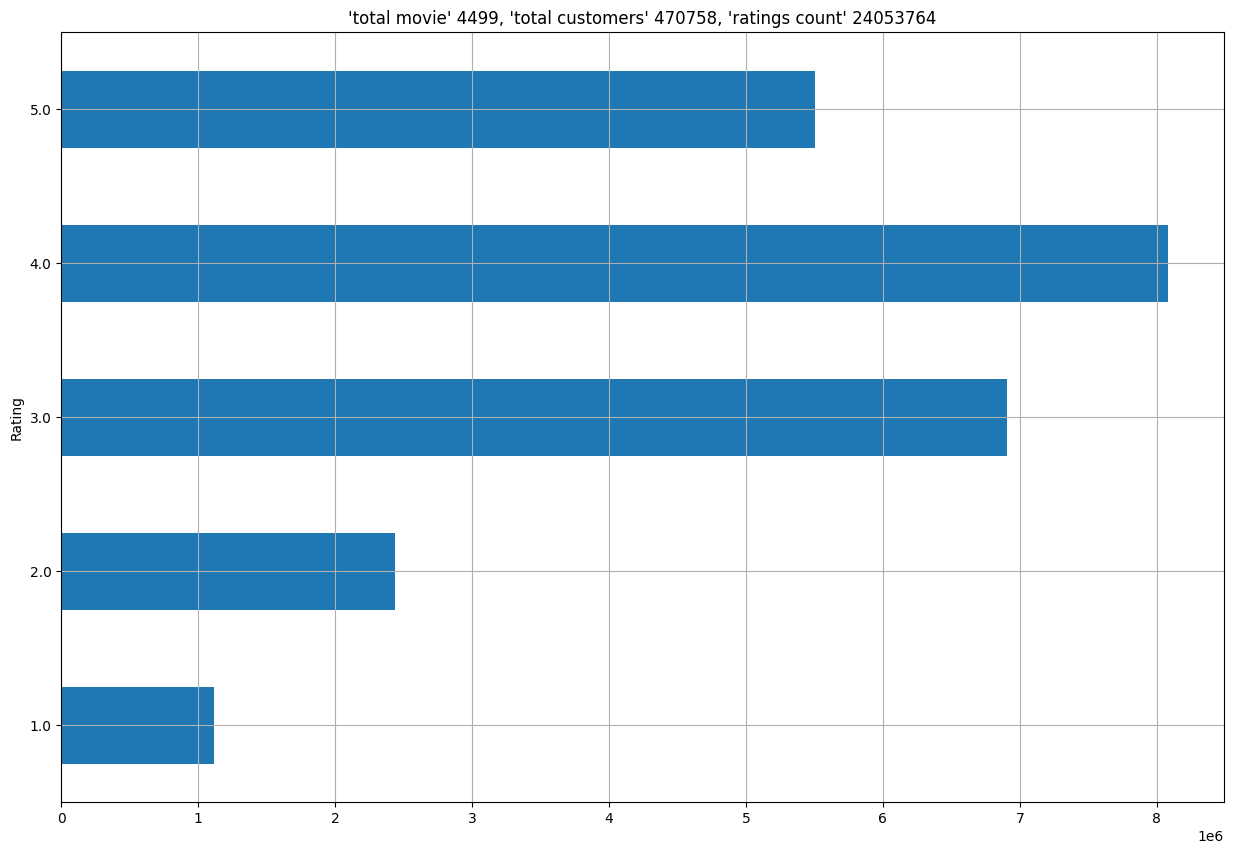

In [11]:
ax = stars.plot(kind = "barh",legend = False,figsize=(15,10))
plt.title(f"'total movie' {movie_count}, 'total customers' {customer_count}, 'ratings count' {ratings_count}" )
plt.grid(True)
plt.show()

Assigning movie no. to each row by keeping the movie_id same untill another value " : " is found

In [12]:
movie_id = None
movie_np = []

for i in netflix_dataset["Cust_Id"]:
  if ":" in i :
    movie_id = int(i.replace(":",""))
  movie_np.append(movie_id)

len(movie_np)

24058263

In [13]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [14]:
netflix_dataset["Movie_Id"] = movie_np
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


remove movie_id from cust_id

In [15]:
netflix_dataset = netflix_dataset[netflix_dataset["Rating"].notna()]
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [16]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


change data type for Cust_id to int

In [17]:
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)

<ipython-input-17-f6b8dcbe5e62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)


In [18]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


No. of Ratings for each Movie_id

In [19]:
dataset_movie_summary = netflix_dataset.groupby("Movie_Id")["Rating"].agg(["count"])
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [22]:
#pre - filtering
#now we will create a filterof benchmark for movies
# BEnchmark - movies below a certain no. of ratings will not be considered
movie_benchmark = round(dataset_movie_summary["count"].quantile(0.6),0)
movie_benchmark

908.0

In [23]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary["count"] < movie_benchmark].index
len(drop_movie_list)

2699

grouping customer id with the no of their respective ratings

In [24]:
dataset_cust_summary = netflix_dataset.groupby("Cust_Id")["Rating"].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


benchmark for customers, so that customers below a certain ratings won't be considered

In [25]:
cust_benchmark = round(dataset_cust_summary["count"].quantile(0.6),0)
cust_benchmark

36.0

In [27]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary["count"] < cust_benchmark].index
len(drop_cust_list)

282042

In [28]:
netflix_dataset = netflix_dataset[~netflix_dataset["Movie_Id"].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset["Cust_Id"].isin(drop_cust_list)]
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


Importing movies Title dataset

In [30]:
df_title = pd.read_csv("/content/drive/MyDrive/NETFLIX/Copy of movie_titles.csv", encoding= "ISO-8859-1",header = None, names = ["Movie_id","year","name"],usecols = [0,1,2])
df_title

,Movie_id,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


**Importing Surprise Library**

The Surprise library is a Python library used for building and analyzing recommender systems. It is particularly useful for collaborative filtering-based recommendation algorithms. Surprise stands for "Simple Python Recommendation System Engine" and is designed to work efficiently with large datasets.

📌 Key Features of Surprise:
- Implements collaborative filtering methods (e.g., matrix factorization and nearest neighbors algorithms).
- Supports both explicit (e.g., ratings) and implicit feedback.
- Provides tools for model evaluation (e.g., RMSE, MAE, precision-recall).
- Allows for custom algorithms to be implemented.
- Works well with pandas and scikit-learn.

In [31]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505171 sha256=7ed28e25b8cc5501075c69c7e73398bfcb608839b890d6b41484edeadfaea977
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [32]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

📌 **1. Reader (Data Preprocessing)**

The Reader class defines the rating scale and format of the dataset. Since different datasets have different rating scales (e.g., 1–5 stars or 0–10 scores), the Reader ensures that Surprise understands the data correctly.
- If using a custom dataset, you must specify the Reader while loading data.
- If using built-in datasets (like ml-100k), the Reader is not required.

📌 **2. Dataset (Loading Data)**

The Dataset module is used to load and process recommendation data.

📌 **3. SVD (Singular Value Decomposition)**

SVD (Singular Value Decomposition) is a matrix factorization algorithm that is widely used in recommendation systems.
- A collaborative filtering algorithm used for making recommendations

In [33]:
reader = Reader()

In [34]:
data = Dataset.load_from_df(netflix_dataset[["Cust_Id","Movie_Id","Rating"]][:1000000],reader)
data

In [35]:
model = SVD()

In [36]:
cross_validate(model,data,measures=["RMSE"],cv = 3)

{'test_rmse': array([0.96942518, 0.96932322, 0.96929252]),
 'fit_time': (18.947129011154175, 27.13021230697632, 20.833277225494385),
 'test_time': (3.6275475025177, 3.955378293991089, 5.505216836929321)}

Making user rating for a certain cust_id

In [37]:
user_rating = netflix_dataset[netflix_dataset["Cust_Id"] == 1331154]
user_rating

,Cust_Id,Rating,Movie_Id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


now we are removing the movies which got less ratings basically which are there in the drop movie list, so we will create a copy of movie title dataset for the user and work on that

In [38]:
user_1331154 = df_title.copy()

In [39]:
user_1331154 = user_1331154[~user_1331154["Movie_id"].isin(drop_movie_list)]
user_1331154

,Movie_id,year,name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


Predicting Ratings for each movie for a certain user

In [40]:
#predication
user_1331154.loc[:, "Estimated_Score"] = user_1331154["Movie_id"].apply(lambda x: model.predict(1331154, x).est)
user_1331154

,Movie_id,year,name,Estimated_Score
2,3,1997.0,Character,3.802486
4,5,2004.0,The Rise and Fall of ECW,4.370951
5,6,1997.0,Sick,3.339476
7,8,2004.0,What the #$*! Do We Know!?,3.697233
15,16,1996.0,Screamers,3.199820
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.776063
17766,17767,2004.0,Fidel Castro: American Experience,3.776063
17767,17768,2000.0,Epoch,3.776063
17768,17769,2003.0,The Company,3.776063


In [52]:
Top_10 = user_1331154.sort_values("Estimated_Score",ascending = False)

In [53]:
#Print top 10 recommendations
Top_10.head(10)

,Movie_id,year,name,Estimated_Score
31,32,2004.0,ABC Primetime: Mel Gibson's The Passion of the...,4.871382
269,270,2001.0,Sex and the City: Season 4,4.816918
222,223,2003.0,Chappelle's Show: Season 1,4.754286
32,33,2000.0,Aqua Teen Hunger Force: Vol. 1,4.570436
4,5,2004.0,The Rise and Fall of ECW,4.370951
117,118,1985.0,Rambo: First Blood Part II,4.314678
67,68,2004.0,Invader Zim,4.301636
142,143,1997.0,The Game,4.296372
164,165,1982.0,Richard Pryor: Live on the Sunset Strip,4.279831
166,167,2004.0,The Chorus,4.270289


In [51]:
#Print bottom 10 recommendations

Bottom_10 = user_1331154.sort_values("Estimated_Score",ascending = True)
Bottom_10.head(10)

,Movie_id,year,name,Estimated_Score
126,127,1987.0,Fatal Beauty,2.405177
94,95,1985.0,Dona Herlinda and Her Son,2.486783
180,181,2004.0,The Last Shot,2.524369
83,84,2002.0,The Powerpuff Girls Movie,2.727855
54,55,1995.0,Jade,2.838515
187,188,2005.0,Dead Birds,2.863251
44,45,1999.0,The Love Letter,2.880673
25,26,2004.0,Never Die Alone,2.909181
16,17,2005.0,7 Seconds,2.986223
109,110,1989.0,Scandal,3.020530


In [57]:
# all the movie rated 5 star by the user
user_1331154 = netflix_dataset[(netflix_dataset['Cust_Id'] == 1331154) & (netflix_dataset['Rating'] == 5)]
user_1331154 = user_1331154.set_index('Movie_Id')
user_1331154 = user_1331154.join(df_title)['name']
user_1331154


,name
Movie_Id,
143,Deepak Chopra: The Way of the Wizard & Alchemy
270,Saludos Amigos
361,The Flintstones in Viva Rock Vegas
457,Blast
482,Rush Hour 2
658,The Last House on the Left
763,Scarface: 20th Anniversary Edition: Bonus Mate...
1144,The Wedding Planner
1425,Go Fish
